In [1]:
from sklearn.datasets import fetch_openml
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
mnist = fetch_openml('mnist_784',parser='auto')

In [3]:
X = mnist['data']
y = mnist['target']

In [4]:
np.shape(y)

(70000,)

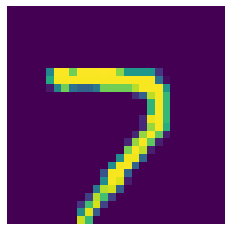

In [5]:
somedigit = X.loc[36003]
somedigit_reshape = somedigit.values.reshape((28,28))
plt.axis('off')
plt.imshow(somedigit_reshape)

In [6]:
X_train,X_test,y_train,y_test = X[:60000],X[60000:],y[:60000],y[60000:]

In [7]:
shuffle_index = np.random.permutation(60000)
X_train,y_train = X_train.loc[shuffle_index],y_train[shuffle_index]

In [8]:
# we now test a 9 classifier as a binary classifier

y_train_7 = (y_train == '7')
X_train_7 = (X_train == 7)

In [9]:

from sklearn.linear_model import SGDClassifier

sgd_clf = SGDClassifier(random_state=42)
sgd_clf.fit(X_train,y_train_7)

sgd_clf.predict([somedigit])

/home/felixs/.local/lib/python3.10/site-packages/sklearn/base.py:409: UserWarning: X does not have valid feature names, but SGDClassifier was fitted with feature names
  warnings.warn(


array([ True])

In [10]:
## Performance measures
# Measuring accuracy via cross validation
from sklearn.model_selection import StratifiedKFold
from sklearn.base import clone

In [11]:
skfolds = StratifiedKFold(n_splits=3)

for train_index, test_index in skfolds.split(X_train,y_train_7):
    clone_clf = clone(sgd_clf)
    X_train_folds = X_train.loc[train_index]
    y_train_folds = y_train_7[train_index]
    X_test_fold = X_train.loc[test_index]
    y_test_fold = y_train_7[test_index]
    
    
    clone_clf.fit(X_train_folds,y_train_folds)
    y_pred = clone_clf.predict(X_test_fold)
    n_correct = sum(y_pred == y_test_fold)
    print(n_correct/len(y_pred))
    
    

0.9743
0.9758
0.9803


In [12]:
from sklearn.model_selection import cross_val_score
cross_val_score(sgd_clf,X_train,y_train_7,cv=3,scoring='accuracy')

# Accuracy seems good, but as only 10% of the set is 7s this accuracy is not enough, or accuracy is a bad performance measure

array([0.9791, 0.9769, 0.9798])

In [16]:
# Confusion matrix

from sklearn.model_selection import cross_val_predict

y_train_pred = cross_val_predict(sgd_clf, X_train,y_train_7,cv=3)

from sklearn.metrics import confusion_matrix

confusion_matrix(y_train_7, y_train_pred)

array([[53210,   525],
       [  759,  5506]])

In [18]:
# accuracy of the positive predictions is called: precision
from sklearn.metrics import precision_score, recall_score,f1_score

print(precision_score(y_train_7,y_train_pred),recall_score(y_train_7,y_train_pred))
print(f1_score(y_train_7,y_train_pred))

0.9129497595755265 0.8788507581803671
0.8955757970071567


In [22]:
# Precision/Recall tradeoff
y_scores = cross_val_predict(sgd_clf,X_train,y_train_7, cv=3,method='decision_function')

from sklearn.metrics import precision_recall_curve
precisions,recalls,thresholds = precision_recall_curve(y_train_7, y_scores)

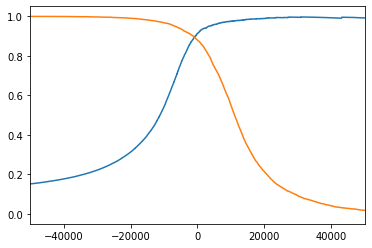

In [27]:
def plot_p_r_t(precisions,recalls,thresholds):
    plt.plot(thresholds,precisions[:-1],label='precision')
    plt.plot(thresholds,recalls[:-1],label='recall')
    
plot_p_r_t(precisions,recalls,thresholds)
plt.xlim(-5e4,5e4)
plt.show()

In [32]:
threshold_90_precisions = thresholds[np.argmax(precisions>=0.90)]

y_train_pred_90 = y_scores>=threshold_90_precisions
print(precision_score(y_train_7,y_train_pred_90),recall_score(y_train_7,y_train_pred_90))

## 'We want to reach 99% Precision!' - 'But at what recall?'

0.9000645786244753 0.8898643256185156


In [33]:
# The ROC Curve
